# Sandbox

This notebook can be used for playing around with the data we used in the paper or generating your own lists of marker candidates with different cell-types or different cutoffs.

Choose a **brain_cell_type** from 'neurons', 'microglia', 'astrocytes', or 'oligodendrocytes'. The default is neurons.

Choose a **cell_tau_cutoff** and **organ_tau_cutoff** (anywhere from 0 to 1 is fine). We have chosen 0.7.

The basic scheme of the code is that all the data used during processing (gene ID conversion dictionaries, gene expression dataframes, mass-spectrometry, tau values, etc.), are stored as keys in the master dictionary **all_data**. 


In [3]:
brain_cell_type = 'neurons'
cell_tau_cutoff = 0.7
organ_tau_cutoff = 0.7

## Importing functions

In [2]:
#setup wrapper functions
from setup import setup_datasets
from tau_calculations import make_taus
from tau_calculations import count_gene_categories
from tau_calculations import make_unified_gene_list,unify_tau_dataframes
from intersect_genes import scatterplot_tau, cutoff_heatmap
from intersect_genes import get_specific_tau, get_final_list


from scipy.ndimage import gaussian_filter
import matplotlib.cm as cm
from intersect_genes import myplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.rcParams["font.family"] = "Arial"

## Processing data

This cell will process the data to create a list of EV candidates and can be used as an example cook-book of sorts for your own exploration.  

Then it will calculate tau values for each gene expression dataframe, and create one master dataframe with all the genes of a given type. We use 'max_uniprots_TMU' as a default. This points to a list we have made of the genes which have a valid uniprot ID, are expressed more in the brain than any other organ, expressed more in the chosen brain-cell type than any other, and have a transmembrane domain. 

You may use a different list if you like (i.e. to find cell-type specific markers that are cytosolic). As long as you pass in a list of uniprot IDs, it should still work.

After creating this unified dataframe, we subset to genes which are specific by Tau for the organ and cell-type of choice, and then annotate this list with mass-spectrometry appearances. The final candidate list is saved as a csv in the results as **"./results/specific_tau_{exp_name)\_{cell_type}.csv"**

Importing protein annotations/ID conversions...


100%|████████████████████████████████| 203711/203711 [00:03<00:00, 60993.18it/s]
/Users/siddharthiyer/Dropbox (MIT)/DAT/Computational/Surface_Markers/bin/import_surfacemarker_data.py:22: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  annotations = pd.read_csv('../data/prot_ann/uniprotkb_homo_sapiens_AND_model_organi_2023_12_06.tsv',  sep='\t')


Done!
Importing mass spectrometry data...
Done!
Creating unified gene lists...
Done!
Unifying tau values into a single matrix...


291it [00:00, 8917.01it/s]

Done!


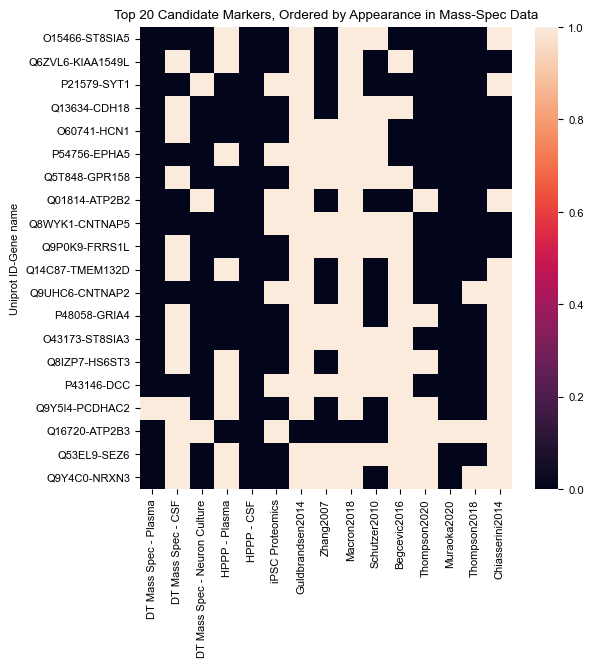

In [6]:
organ_type = 'Brain'

all_data = setup_datasets(brain_cell_type, organ_type)

all_data = make_taus(all_data, show_plots = False)

all_data = make_unified_gene_list(all_data)

all_data = unify_tau_dataframes(all_data, all_data['max_uniprots_TMU'])

all_data = get_specific_tau(all_data, 
                            organ_tau_cutoff = organ_tau_cutoff,
                            cell_tau_cutoff = cell_tau_cutoff,
                             cluster_tau = False)
plt.rcParams.update({'font.size': 8})
all_data = get_final_list(all_data, exp_name = '20240402', topk= 20,
                          use_scimilarity = False, show_heatmap= True)

## Single Gene Info

We have a function called **single_gene_info** that allows one to examine the raw data for any gene more closely.

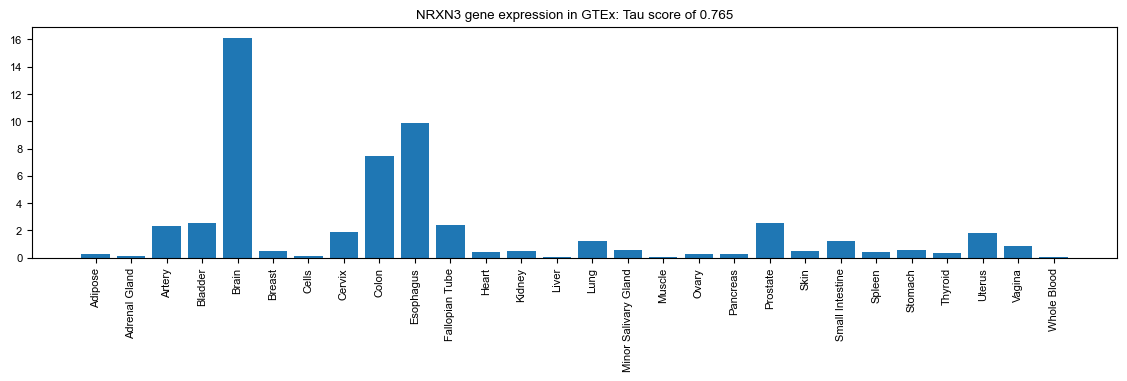

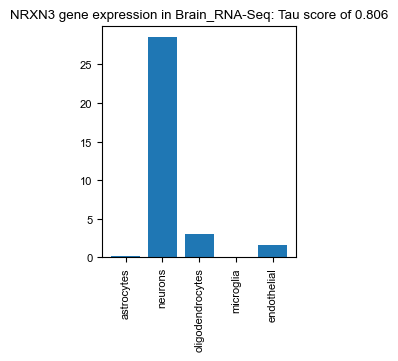

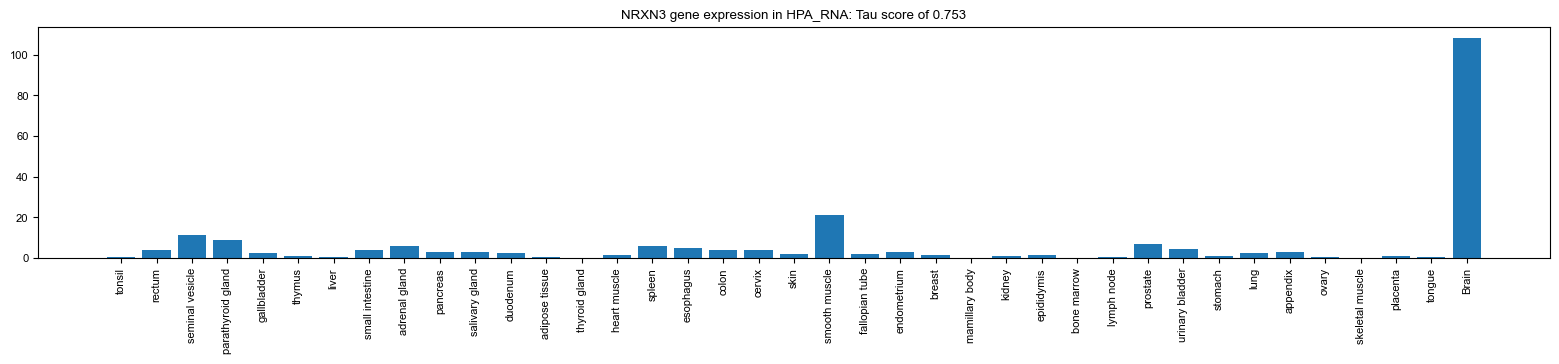

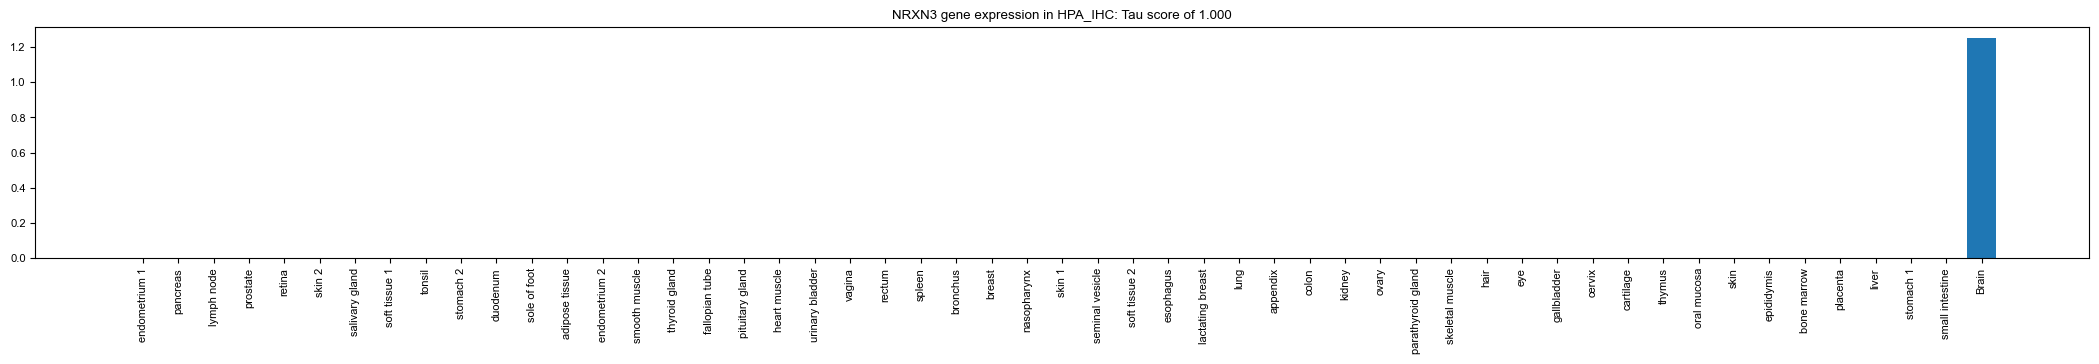

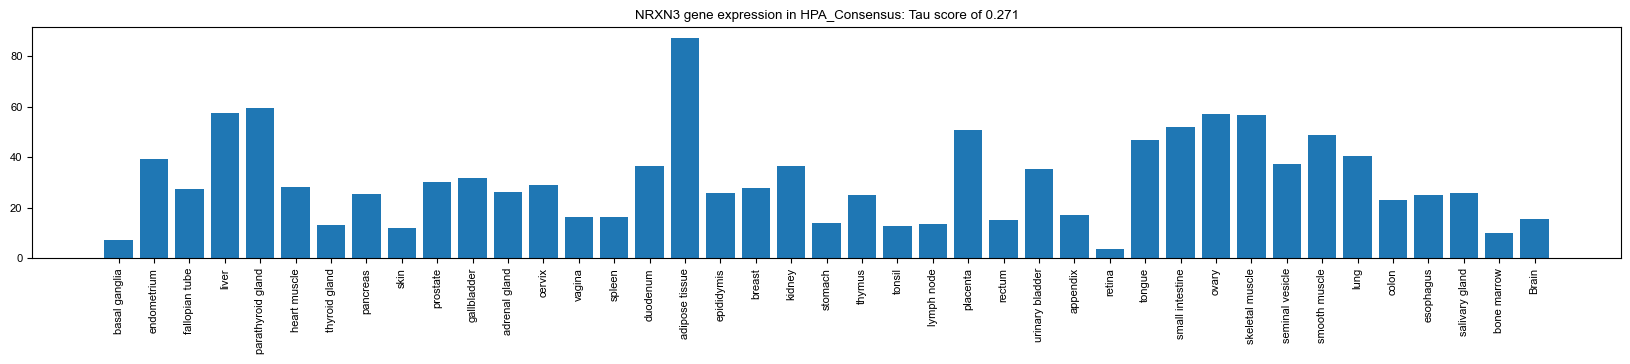

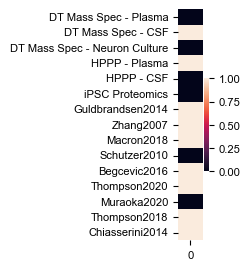

In [8]:
from intersect_genes import single_gene_info

single_gene_info('NRXN3', all_data)

# Happy exploring!!

We hope you enjoy using this notebook to learn more about cell-type specific markers!